In [150]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns

In [151]:
data = []
labels = []
with open("training_set.tsv") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    for i, line in enumerate(tsvreader):
        if i %2 == 0:
            data.extend(line)
        else : 
            labels.extend(line)
print(len(data), len(labels))


5778 5778


In [152]:
df = pd.DataFrame(zip(data,labels),columns = ['sentence','sentiment'])
removed_word = ''' ！？｡*。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏.+-'''
removed_word += '1234567890' +'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
print(removed_word)
df['sentence'] = df['sentence'].apply(lambda sen : ''.join([word for word in sen if word not in removed_word]))

 ！？｡*。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏.+-1234567890abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ


In [153]:
mask = np.random.rand(len(df)) <0.9
train = df[mask]
test = df[~mask]
test.to_csv('test.tsv',sep='\t',index=False)

In [154]:
#train = train.append([train[train['sentiment']=='negative']]*3)
#train = train.append([train[train['sentiment']=='positive']]*3)


In [155]:
train.to_csv('train.tsv',sep='\t',index=False)

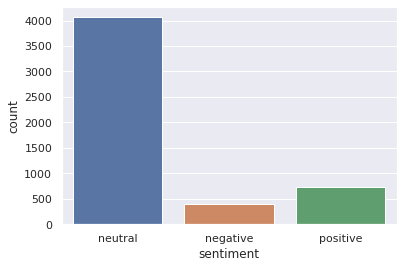

In [156]:
sns.set(style="darkgrid")
ax = sns.countplot(x='sentiment',  data=train)